Get Twitter data

The steps below will help you set up your twitter account to be able to access live stream tweets.

1. Create a Twitter account if you do not have one.
2. Go to https://dev.twitter.com/apps and log in with your Twitter credentials.
3. Click "Create New App"
4. Fill out the form and agree to the terms. Put in a dummy website if you don't have one you want to use.
5. On the next page, click the "Keys and Access Tokens" tab along the top, then scroll all the way down until you see the section "Your Access Token"
6. Click the button "Create My Access Token". You can Read more about Oauth authorization.
7. You will now copy your unique four values into twitterstream.py (download this file on your computer). These values are your "API Key", your "API secret", your "Access token", and your "Access token secret". Open twitterstream.py and set the variables corresponding to the api key, api secret, access token, and access secret. You will see code like the below in line 6-9 of the file:
""api_key = "<Enter api key>"
api_secret = "<Enter api secret>"
access_token_key = "<Enter your access token key here>"
access_token_secret = "<Enter your access token secret here>"
""""
After pasting the four credentials into the twitterstream.py, save the file and go to command line and type: python twitterstream.py > tweets.txt. Make sure you are in the directory where the file twittersteam.py is saved.

In [1]:
import pandas as pd
import os

import tweepy
import pandas as pd
from textblob import TextBlob
import csv

import sys
print (sys.path)

import os
os.getcwd()
import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet


['', 'C:\\Users\\DS7_RVepuri\\AppData\\Local\\Continuum\\anaconda3\\python36.zip', 'C:\\Users\\DS7_RVepuri\\AppData\\Local\\Continuum\\anaconda3\\DLLs', 'C:\\Users\\DS7_RVepuri\\AppData\\Local\\Continuum\\anaconda3\\lib', 'C:\\Users\\DS7_RVepuri\\AppData\\Local\\Continuum\\anaconda3', 'C:\\Users\\DS7_RVepuri\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages', 'C:\\Users\\DS7_RVepuri\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\Babel-2.5.0-py3.6.egg', 'C:\\Users\\DS7_RVepuri\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\DS7_RVepuri\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\DS7_RVepuri\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\DS7_RVepuri\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\DS7_RVepuri\\.ipython']


In [2]:
from nltk.corpus import stopwords

In [3]:
twitter_data = pd.read_csv("twitter_Corona.csv")

In [4]:
twitter_data.head()

,2020-03-04 08:43:18,b'Coronavirus threat: Basketball Africa League inaugural season deferred\n\nRead more:-https://t.co/d6Le5njrB6\xe2\x80\xa6 https://t.co/u8rQthL1d3'
0,2020-03-04 08:43:17,b'RT @IFClinChem: #IFCCWorldlab2020 is postpon...
1,2020-03-04 08:43:17,b'RT @SHELTONZOR: Is anyone else\xe2\x80\x99a ...
2,2020-03-04 08:43:16,"b""RT @DDNational: PLEASE RETWEET -\nDON'T PANI..."
3,2020-03-04 08:43:16,b'RT @globaltimesnews: Chinese scientists have...
4,2020-03-04 08:43:16,b'Reduce your risk from #coronavirus'


In [5]:
twitter_data.columns=['date_time','tweets']

In [6]:
twitter_data.head()

,date_time,tweets
0,2020-03-04 08:43:17,b'RT @IFClinChem: #IFCCWorldlab2020 is postpon...
1,2020-03-04 08:43:17,b'RT @SHELTONZOR: Is anyone else\xe2\x80\x99a ...
2,2020-03-04 08:43:16,"b""RT @DDNational: PLEASE RETWEET -\nDON'T PANI..."
3,2020-03-04 08:43:16,b'RT @globaltimesnews: Chinese scientists have...
4,2020-03-04 08:43:16,b'Reduce your risk from #coronavirus'


In [7]:
twitter_data.shape

(4999, 2)

# NLP Pre-Processing

Lets work with "cleaning_tweets" to prepare our model final dataframe.the goal is to produce tokens for every document. these documents will make our corpora where we will draw our vocabulary form.

1. Cleaned_tweets = It keeps only alphabets and numbers and removes rest all the characters emoticons.

2. Comments = In order to calculate the sentiment of a piece of text, we split it into individual words. and start checking each word whether it is positive , negative , & neutral.

3. Score = We have a database of words, each with a "score" to determine how positive or negative it is.The higher the score, the more positive the word similarly for negative words.
Not every word in a piece of positive text will be positive or negative, but by feeding the number of identified words and their scores into our algorithm, we end up with a score for the sentiment of the text.

In [8]:
import re
cleaned_tweets=[]
comments = []
score=[]

for i in range(len(twitter_data)):
    review = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)',' ',
                    twitter_data['tweets'][i]) #removing special characters
    review = re.sub('rt','',review)
    review = review.lower() #converting all the tweets into lower case
    review = review.split() #splitting the tweets into words/tokens
    review = ' '.join(review) #Join the cleaned and tokenised words back into a sentence
    cleaned_tweets.append(review) #Appending the cleaned sentences to a corpus
    review = TextBlob(review)
    score.append(review.sentiment.polarity) #Gives the Sentiment Score for each tweet
    if review.sentiment.polarity >0:
         comments.append('Positive')
    elif review.sentiment.polarity == 0:
         comments.append('Neutral')
    else:
         comments.append('Negative')

In [9]:
twitter_data['tweets']=twitter_data['tweets'].replace('b','')
twitter_data['tweets']=twitter_data['tweets'].replace('rt','')
twitter_data['tweets']=twitter_data['tweets'].replace('PHONE','')
twitter_data['tweets']=twitter_data['tweets'].replace('Apple','')
twitter_data['tweets']=twitter_data['tweets'].replace('iphone','')
twitter_data['tweets']=cleaned_tweets
twitter_data['score']=score
twitter_data['Comments']=comments

In [10]:
twitter_data.head()

,date_time,tweets,score,Comments
0,2020-03-04 08:43:17,b rt ifccworldlab2020 is postponed due to grow...,0.005682,Positive
1,2020-03-04 08:43:17,b rt is anyone else xe2 x80 x99a town idiots s...,-0.277778,Negative
2,2020-03-04 08:43:16,b rt please retweet ndon t panic n coronavirus...,0.000000,Neutral
3,2020-03-04 08:43:16,b rt chinese scientists have achieved consider...,0.050000,Positive
4,2020-03-04 08:43:16,b reduce your risk from coronavirus,0.000000,Neutral


In [11]:
print(cleaned_tweets)

['b rt ifccworldlab2020 is postponed due to growing concerns on coronavirus and worldwide travel restrictions a new date for th xe2 x80 xa6', 'b rt is anyone else xe2 x80 x99a town idiots stocking up on toilet paper like it xe2 x80 x99s going to save their lives xf0 x9f xa4 xa3 xf0 x9f xa4 xa3 personally id stock up on m xe2 x80 xa6', 'b rt please retweet ndon t panic n coronavirus basic protective measures navoid close contact with anyone if you are experien xe2 x80 xa6', 'b rt chinese scientists have achieved considerable progress in developing vaccines against the novel coronavirus and are xe2 x80 xa6', 'b reduce your risk from coronavirus', 'b rt xf0 x9f x93 xb0 nglobal times repoing about an interesting mutation of the coronavirus xe2 xac x87 xef xb8 x8f', 'b rt it xe2 x80 x99s quite easy to wash your hands wrong for a full 20 seconds n ndo it right xf0 x9f x91 x87 xf0 x9f x8f xbc xf0 x9f x91 x87 xf0 x9f x8f xbc coronavirus washyourhands', 'b rt off covid 19 cases in india 28 n n1

In [12]:
print (score)

[0.005681818181818177, -0.2777777777777778, 0.0, 0.05, 0.0, 0.5, 0.14226190476190476, 0.0, 0.0, -0.65, 0.22727272727272727, 0.3666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7142857142857143, 0.0, 0.16, -0.2916666666666667, 0.24242424242424243, 0.0, -0.125, 0.16666666666666666, 0.0, -0.35714285714285715, 0.4041666666666667, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, -0.04583333333333334, 0.5, 0.0, 0.0, 0.06818181818181818, 0.0, 0.22727272727272727, 0.1875, 0.0, 0.22727272727272727, 0.5, 0.0, 0.0, 0.05000000000000002, 0.2511111111111111, 0.0, 0.55, 0.0, -0.3357142857142857, 0.0, 0.0, 0.0, 0.06818181818181818, 0.5, -0.375, 0.0, 0.0, 0.0, -1.0, 0.3, 0.0, 0.16, -0.125, 0.0, 0.0, 0.0, -0.08333333333333333, 0.0, 0.05, 0.0, 0.0, -0.07777777777777779, 0.0, 0.21666666666666667, 0.013636363636363627, 0.12222222222222223, 0.12222222222222223, 0.1, 0.2, 0.0, 0.0, 0.0, 0.21212121212121213, 0.3761904761904762, 0.0, 0.06666666666666667, 0.4, 0.21212121212121213, 0.05000000000000002, 0.0, 0.0, 0.0, -0.05, -0.1

In [13]:
print(comments)

['Positive', 'Negative', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Negative', 'Positive', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Negative', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral

In [14]:
twitter_data.head()

,date_time,tweets,score,Comments
0,2020-03-04 08:43:17,b rt ifccworldlab2020 is postponed due to grow...,0.005682,Positive
1,2020-03-04 08:43:17,b rt is anyone else xe2 x80 x99a town idiots s...,-0.277778,Negative
2,2020-03-04 08:43:16,b rt please retweet ndon t panic n coronavirus...,0.000000,Neutral
3,2020-03-04 08:43:16,b rt chinese scientists have achieved consider...,0.050000,Positive
4,2020-03-04 08:43:16,b reduce your risk from coronavirus,0.000000,Neutral


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(comments,order=['Negative','Neutral','Positive'],palette=['Red','Blue','Green'])

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


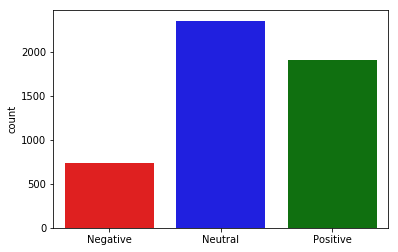

In [16]:
plt.show()

In [17]:
labels = 'Positive', 'Neutral', 'Negative'
sizes = [comments.count("Positive"), comments.count("Neutral"),comments.count("Negative")]

In [18]:
print(sizes)

[1908, 2355, 736]


In [19]:
import html

decoded_review = html.unescape(cleaned_tweets)
print(decoded_review)

['b rt ifccworldlab2020 is postponed due to growing concerns on coronavirus and worldwide travel restrictions a new date for th xe2 x80 xa6', 'b rt is anyone else xe2 x80 x99a town idiots stocking up on toilet paper like it xe2 x80 x99s going to save their lives xf0 x9f xa4 xa3 xf0 x9f xa4 xa3 personally id stock up on m xe2 x80 xa6', 'b rt please retweet ndon t panic n coronavirus basic protective measures navoid close contact with anyone if you are experien xe2 x80 xa6', 'b rt chinese scientists have achieved considerable progress in developing vaccines against the novel coronavirus and are xe2 x80 xa6', 'b reduce your risk from coronavirus', 'b rt xf0 x9f x93 xb0 nglobal times repoing about an interesting mutation of the coronavirus xe2 xac x87 xef xb8 x8f', 'b rt it xe2 x80 x99s quite easy to wash your hands wrong for a full 20 seconds n ndo it right xf0 x9f x91 x87 xf0 x9f x8f xbc xf0 x9f x91 x87 xf0 x9f x8f xbc coronavirus washyourhands', 'b rt off covid 19 cases in india 28 n n1

In [20]:
pattern = r"]\&\#[0-9]+\[;'x80''xe2''xa6'"

twitter_data["clean_data"] = twitter_data["tweets"].str.replace(pat=pattern, repl="", regex=True)

print(twitter_data["clean_data"])

0       b rt ifccworldlab2020 is postponed due to grow...
1       b rt is anyone else xe2 x80 x99a town idiots s...
2       b rt please retweet ndon t panic n coronavirus...
3       b rt chinese scientists have achieved consider...
4                     b reduce your risk from coronavirus
                              ...                        
4994    b rt if borisjohnson did shake the hands of pe...
4995    b rt personal protective equipment or ppe incl...
4996    b rt healthcare workers rely on personal prote...
4997    b rt personal protective equipment or ppe incl...
4998    b rt tuc propoion of salary covered by sick pa...
Name: clean_data, Length: 4999, dtype: object


# Extracting The Root Word

We'll be using Lemmatization to reduce tokens to their base word. This technique takes into account context similarity according to part-of-speech anatomy. Stemming is another common approach, although stemming only performs truncation and would not be able to reduce "taught" to "teach".

We will be using the WordNetLemmatizer from the Natural Language Toolkit (or NLTK). Lemmatization only applies to each word but it is dependent on sentence structure to understand context. We therefore need to have part-of-speech tags associated with each word. Our output is derived from applying the lemmatize_doc function to our preprocessed column.

In [21]:
import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

#import nltk resources
resources = ["wordnet", "stopwords", "punket", "averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]

for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
        nltk.download(resource)
        
#creating Lemmatizer object
L = WordNetLemmatizer()

def lemmatize_word (tagged_token):  #returns lemmatized word with its tag
    root = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith ('V'):
            root.append (L.lemmatize(word, wordnet.VERB))
        elif tag.startswith ('J'):
            root.append (L.lemmatize(word, wordnet.ADJ))
        elif tag.startswith ('R'):
            root.append (L.lemmatize(word, wordnet.ADV))
        elif tag.startswith ('N'):
            root.append (L.lemmatize(word, wordnet.NOUN))
        else:
            root.append (word)
    return root

def lemmatize_doc(document):  #tags words then returns sentence with lemmatized words
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document)
    for sentence in tokenized_sent:
        symbols = re.sub(r"['`\",.!?()]", " ", sentence)
        tkn_word = word_tokenize(symbols)
        tag_token = pos_tag(tkn_word)
        lemmatized = lemmatize_word(tag_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)

#apply functions
twitter_data["clean_data"] = twitter_data["clean_data"].apply(lambda row: lemmatize_doc(row))
print(twitter_data["clean_data"])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DS7_RVepuri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DS7_RVepuri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading punket: Package 'punket' not found in index
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DS7_RVepuri\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\DS7_RVepuri\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
0       b rt ifccworldlab2020 be postpone due to grow ...
1       b rt be anyone else xe2 x80 x99a town idiot st...
2       b rt please retweet ndon t panic n coron

In [22]:
print(twitter_data["clean_data"])

0       b rt ifccworldlab2020 be postpone due to grow ...
1       b rt be anyone else xe2 x80 x99a town idiot st...
2       b rt please retweet ndon t panic n coronavirus...
3       b rt chinese scientist have achieve considerab...
4                     b reduce your risk from coronavirus
                              ...                        
4994    b rt if borisjohnson do shake the hand of peop...
4995    b rt personal protective equipment or ppe incl...
4996    b rt healthcare worker rely on personal protec...
4997    b rt personal protective equipment or ppe incl...
4998    b rt tuc propoion of salary cover by sick pay ...
Name: clean_data, Length: 4999, dtype: object


# Normalizing the Tweets

Here each tweet will be normalized from UTF-8 to ASCII encoding. It removes syllables in the tweets and returns us in simple language 

In [23]:
from unicodedata import normalize  # use NFKD algorithm to normalize 
remove_syllable = lambda x : normalize("NFKD", x).encode("ascii", "ignore"). decode("utf-8", "ignore")
twitter_data["clean_data"] = twitter_data["clean_data"].apply (remove_syllable)
print(twitter_data["clean_data"])

0       b rt ifccworldlab2020 be postpone due to grow ...
1       b rt be anyone else xe2 x80 x99a town idiot st...
2       b rt please retweet ndon t panic n coronavirus...
3       b rt chinese scientist have achieve considerab...
4                     b reduce your risk from coronavirus
                              ...                        
4994    b rt if borisjohnson do shake the hand of peop...
4995    b rt personal protective equipment or ppe incl...
4996    b rt healthcare worker rely on personal protec...
4997    b rt personal protective equipment or ppe incl...
4998    b rt tuc propoion of salary cover by sick pay ...
Name: clean_data, Length: 4999, dtype: object


# Tokenization

from cleaned tweets we take out corpora which is simply a collection of documents. Each tweet is transformed into the list of words.

In [24]:
corpora = twitter_data["clean_data"].values
tokenize = [corpus.split(" ") for corpus in corpora]

print(tokenize)

[['b', 'rt', 'ifccworldlab2020', 'be', 'postpone', 'due', 'to', 'grow', 'concern', 'on', 'coronavirus', 'and', 'worldwide', 'travel', 'restriction', 'a', 'new', 'date', 'for', 'th', 'xe2', 'x80', 'xa6'], ['b', 'rt', 'be', 'anyone', 'else', 'xe2', 'x80', 'x99a', 'town', 'idiot', 'stock', 'up', 'on', 'toilet', 'paper', 'like', 'it', 'xe2', 'x80', 'x99s', 'go', 'to', 'save', 'their', 'life', 'xf0', 'x9f', 'xa4', 'xa3', 'xf0', 'x9f', 'xa4', 'xa3', 'personally', 'id', 'stock', 'up', 'on', 'm', 'xe2', 'x80', 'xa6'], ['b', 'rt', 'please', 'retweet', 'ndon', 't', 'panic', 'n', 'coronavirus', 'basic', 'protective', 'measure', 'navoid', 'close', 'contact', 'with', 'anyone', 'if', 'you', 'be', 'experien', 'xe2', 'x80', 'xa6'], ['b', 'rt', 'chinese', 'scientist', 'have', 'achieve', 'considerable', 'progress', 'in', 'develop', 'vaccine', 'against', 'the', 'novel', 'coronavirus', 'and', 'be', 'xe2', 'x80', 'xa6'], ['b', 'reduce', 'your', 'risk', 'from', 'coronavirus'], ['b', 'rt', 'xf0', 'x9f', 'x93

# Phase Modelling

there are some words where the porbability of 2nd word comming after 1st word is high. so we will check for bigrams & trigrams.

1. Bigrams: A  bigram makes a prediction for a word based on the one before.
2. Trigrams : A trigram makes a prediction for the word based on the two words before that.

In [25]:
!pip install -U gensim
from gensim.models import Phrases
from gensim.models. phrases import Phraser

Requirement already up-to-date: gensim in c:\users\ds7_rvepuri\appdata\local\continuum\anaconda3\lib\site-packages (3.8.1)


In [26]:
bi_gram = Phrases(tokenize, min_count=300, threshold=50)
tri_gram = Phrases(bi_gram[tokenize], min_count=300, threshold=50)

**Generating Unigrams**

Unigrams are the single word tokens

In [27]:
Unigram_tokens = set([token for t in tokenize for token in t])
Unigram_tokens = set(filter (lambda x: x != "", Unigram_tokens))

print(list(Unigram_tokens))

['nstop', 'nshakti', 'ocado', 'scum', 'x9cthis', 'click', 'arrival', 'handy', 'handshakes', 'debt', 'gender', 'considerable', 'cherry', 'fingeips', 'personalised', 'track', 'emerge', 'healthiswealth', 'uc', 'defunde', 'fu', 'o', 'gom', 'conf', 'mediocre', 'singapore', 'most', 'recovery', 'belarus', 'enteain', 'omfg', 'sickpay', 'commander', 'g', 'effect', 'contaminate', 'actively', 'unfounately', 'thought', 'incidentally', 'upto', 'asteroid', 'tow', 'site', 'k', 'swamiom', 'retailgazette', 'powder', 'spirit', 'maharaj', 'nle', '63', 'approach', 'nread', 'breathe', 'arisin', 'guide', 'after', 'realize', 'paicular', 'x9cdid', 'epicenter', 'taiwan', 'before', 'britain', 'nhong', 'pai', 'horseboredom', 'fly', 'comparative', 'homeopathic', 'x91', 'tenerife', 'excellent', 'bath', 'xc4', 'borisnjohnson', 'protective', 'trumpl', 'gtto', 'staywoke', 'chilkur', 'press', '2017', 'origin', 'statement', 'smh', 'cultist', 'x99all', 'milano', 'spreading', 'protest', 'nthen', 'scottish', 'ratio', 'cel

 **Generating Bigrams**

In [28]:
Bigram = bi_gram.min_count
Bigram_statement = lambda x: x[1] >= Bigram
Bigram_tokens = dict(filter(Bigram_statement, bi_gram.vocab.items()))
Bigram_tokens = set([token.decode("utf-8") \
                     for token in Bigram_tokens])
Unique_Bigrams = Bigram_tokens.difference(Unigram_tokens)
print(list(Unique_Bigrams))

['n_n', 'x80_xa2', 'the_coronavirus', 'b_rt', 'n_xe2', 'xf0_x9f', 'x80_xa6', 'x9f_x87', 'n_coronavirus', 'xe2_x80', 'of_coronavirus']


** Generating Trigram**

Trigram are generated by applying another gensim pharser on top of Bigram Pharser.
The code below takes all the unigram in corpus

In [29]:
trigram = tri_gram.min_count
trigram_eq = lambda x: x[1] >= trigram
Trigram_token = dict(filter(trigram_eq, tri_gram.vocab.items()))
Trigram_token = set([token.decode("utf-8") \
                     for token in Trigram_token])
unique_trigrams = Trigram_token.difference(Bigram_tokens)

print(list(unique_trigrams))

[]


from above outcome we came to know - our data is having only unigrams and Bigrams

In [30]:
tokenize = [list(filter(lambda x: len(x) > 3, document)) \
             for document in tokenize]

print(tokenize)

[['ifccworldlab2020', 'postpone', 'grow', 'concern', 'coronavirus', 'worldwide', 'travel', 'restriction', 'date'], ['anyone', 'else', 'x99a', 'town', 'idiot', 'stock', 'toilet', 'paper', 'like', 'x99s', 'save', 'their', 'life', 'personally', 'stock'], ['please', 'retweet', 'ndon', 'panic', 'coronavirus', 'basic', 'protective', 'measure', 'navoid', 'close', 'contact', 'with', 'anyone', 'experien'], ['chinese', 'scientist', 'have', 'achieve', 'considerable', 'progress', 'develop', 'vaccine', 'against', 'novel', 'coronavirus'], ['reduce', 'your', 'risk', 'from', 'coronavirus'], ['nglobal', 'time', 'repoing', 'about', 'interesting', 'mutation', 'coronavirus'], ['x99s', 'quite', 'easy', 'wash', 'your', 'hand', 'wrong', 'full', 'second', 'right', 'coronavirus', 'washyourhands'], ['covid', 'case', 'india', 'delhi', 'agra', 'italian', 'indian', 'driver', 'telangana', 'kerala'], ['concern', 'about', 'situation', 'need', 'panic', 'delhi', 'arvind', 'kejriwal', 'coronavirus', 'case'], ['what', 'c

# Creating Vocabulary

The vocabulary is the key value pairs of all the unique tokens from every tweet. Each token is assigned to ID. 

In [31]:
from gensim.corpora.dictionary import Dictionary

voc = Dictionary(tokenize)

voc_keys = list(voc.token2id)[0:15]

for key in voc_keys:
    print(f"ID: {voc.token2id[key]}, Token: {key}")

ID: 0, Token: concern
ID: 1, Token: coronavirus
ID: 2, Token: date
ID: 3, Token: grow
ID: 4, Token: ifccworldlab2020
ID: 5, Token: postpone
ID: 6, Token: restriction
ID: 7, Token: travel
ID: 8, Token: worldwide
ID: 9, Token: anyone
ID: 10, Token: else
ID: 11, Token: idiot
ID: 12, Token: life
ID: 13, Token: like
ID: 14, Token: paper


# Count- Based Feature Engineering

In order for a machine learning model to work with text input, the document must first be vectorized. This simply means that the input has to be converted into containers of numerical values.

**Bag of Words Model **

The classical approach in expressing text as a set of features is getting the token frequency. Each entry to the dataframe is a document while each column corresponds to every unique token in the entire corpora. The row will identify how many times a word appears in the document. The `bow` model for the sample review is below:

In [32]:
bow = [voc.doc2bow(doc) for doc in tokenize]

for idx, freq in bow[0]:
    print(f"Word: {voc.get(idx)}, Frequency: {freq}")

Word: concern, Frequency: 1
Word: coronavirus, Frequency: 1
Word: date, Frequency: 1
Word: grow, Frequency: 1
Word: ifccworldlab2020, Frequency: 1
Word: postpone, Frequency: 1
Word: restriction, Frequency: 1
Word: travel, Frequency: 1
Word: worldwide, Frequency: 1


# TF-IDF Model

The Term Frequency-Inverse Document Frequency (TF-IDF) approach assigns continuous values instead of simple integers for the token frequency. Words that appear frequently overall tend to not establish saliency in a document, and are thus weighted lower. Words that are unique to some documents tend to help distinguish it from the rest and are thus weighted higher. The tfidf weighting is based on our bow variable.

In [33]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(bow)

for idx, weight in tfidf[bow[0]]:
    print(f"Word: {voc.get(idx)}, Weight: {weight:.3f}")

Word: concern, Weight: 0.264
Word: coronavirus, Weight: 0.021
Word: date, Weight: 0.348
Word: grow, Weight: 0.360
Word: ifccworldlab2020, Weight: 0.485
Word: postpone, Weight: 0.314
Word: restriction, Weight: 0.422
Word: travel, Weight: 0.262
Word: worldwide, Weight: 0.314


## Word Embedding for Feature Engineering ##
The downside of count-based techniques is that without regard to word sequence and sentence structure, the semantics get lost. The *Word2Vec* technique, on the other hand, actually embeds meaning in vectors by quantifying how often a word appears within the vicinity of a given set of other words.

A context window the span of `context_size` slides across every document one token at a time. In each step, the center word is described by its adjacent words and the probability that the token appears together with the others is expressed in `feature_size` dimensions. Since the minimum word requirement is set to `1`, every token in the corpora is embedded in the *Word2Vec* model.

In [34]:
import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)

feature_size = 100
context_size = 20
min_word = 1

word_vec= word2vec.Word2Vec(tokenize, size=feature_size, \
                            window=context_size, min_count=min_word, \
                            iter=50, seed=42)

# Final DataFrame

The goal is to have a dataframe with observations corresponding to the product reviews. The word_vec model is used to gather all the unique tokens in the corpora. This enables us to generate the word_vec_df which makes use of the dimensions as the features of every word.

In [35]:
word_vec_unpack = [(word, idx.index) for word, idx in \
                   word_vec.wv.vocab.items()]

tokens, indexes = zip(*word_vec_unpack)

word_vec_df = pd.DataFrame(word_vec.wv.syn0[indexes, :], index=tokens)

display(word_vec_df.head())

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ifccworldlab2020,0.042135,-0.070845,-0.092072,0.000869,-0.020924,-0.090033,-0.019413,0.116442,0.178580,-0.196573,...,0.016999,-0.034277,0.152210,-0.140457,0.011150,0.095154,0.024374,0.116313,0.124162,-0.060777
postpone,-0.566481,0.671383,0.310850,0.556309,0.315621,-0.605398,-1.426707,0.615272,1.245851,-1.310820,...,0.353044,0.419243,1.587910,-1.308189,0.231350,0.430825,0.406852,0.462714,0.964531,-0.672533
grow,-0.037534,0.053854,-0.190414,0.514681,0.252310,0.002965,-0.123209,0.476202,0.422286,-0.773236,...,0.201793,0.138699,-0.020013,0.072549,-0.049896,0.352104,0.173524,0.484109,0.183449,-0.135786
concern,-0.023550,0.065430,0.703482,0.046636,0.244423,1.284435,-0.338893,0.243905,0.400561,-2.400297,...,-0.416512,1.381591,1.694905,0.852492,-1.541105,0.668608,0.201693,-1.336217,1.185265,-0.259198
coronavirus,-0.327197,-1.186721,-0.214381,0.046531,-0.213391,-0.898435,0.504185,-0.642408,0.394273,-0.984997,...,0.517990,0.263681,0.028457,0.342214,-1.101100,0.234719,0.821352,1.528383,-0.961405,-1.101931


The word_vec_df is sliced by the words that appear in a given tokenized tweet and the mean along every dimension is taken. The resulting model_array shape is therefore the word count on axis 0 and the number of dimensions on axis 1. This singularizes multiple word embeddings into one observation for each review.

If multiple occurrences of a word occurs in a review, then this only emphasizes the token since the row is pulled towards the values of the vectors of that word.

In [36]:
tokenized_array = np.array(tokenize)

model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])

Every document is provided the ground truth label by imposing its `overall` rating. This completes our finalized `model_df` dataframe.

In [37]:
twitter_data.head()

,date_time,tweets,score,Comments,clean_data
0,2020-03-04 08:43:17,b rt ifccworldlab2020 is postponed due to grow...,0.005682,Positive,b rt ifccworldlab2020 be postpone due to grow ...
1,2020-03-04 08:43:17,b rt is anyone else xe2 x80 x99a town idiots s...,-0.277778,Negative,b rt be anyone else xe2 x80 x99a town idiot st...
2,2020-03-04 08:43:16,b rt please retweet ndon t panic n coronavirus...,0.000000,Neutral,b rt please retweet ndon t panic n coronavirus...
3,2020-03-04 08:43:16,b rt chinese scientists have achieved consider...,0.050000,Positive,b rt chinese scientist have achieve considerab...
4,2020-03-04 08:43:16,b reduce your risk from coronavirus,0.000000,Neutral,b reduce your risk from coronavirus


In [38]:
model_df = pd.DataFrame(model_array)
model_df["Comments"] = twitter_data["clean_data"]

display(model_df.head())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Comments
0,0.022468,-0.255259,-0.296845,0.091414,0.028120,-0.327480,-0.110689,0.247038,0.410001,-0.698171,...,0.174160,0.271545,-0.273205,-0.312536,0.220483,0.129051,0.548075,0.104831,-0.243715,b rt ifccworldlab2020 be postpone due to grow ...
1,-0.272544,0.520144,0.586538,-0.106260,-1.253562,-0.529685,-0.198331,0.130208,0.331318,0.379542,...,-0.143632,0.593588,-0.018499,-0.511964,0.135675,0.395242,0.184098,0.099131,0.522830,b rt be anyone else xe2 x80 x99a town idiot st...
2,-1.142192,-0.073866,0.285925,0.069599,-0.510710,-1.897934,0.003667,-1.388270,0.316800,-1.183123,...,0.133510,-0.146724,-0.301177,-1.640360,0.182531,0.990405,0.276387,0.152840,0.684641,b rt please retweet ndon t panic n coronavirus...
3,0.072262,0.113602,0.322011,0.164323,0.230205,-0.457755,0.584299,0.236838,0.149072,0.269393,...,-0.027167,-0.921969,-0.199147,-0.048745,0.461439,0.690821,0.555237,0.544873,0.739246,b rt chinese scientist have achieve considerab...
4,0.311354,-0.567362,0.522664,0.612825,0.293736,-1.367510,0.329151,-0.431467,0.544155,-0.765934,...,-0.140604,0.708058,-0.564240,-1.079903,0.656319,0.893210,-0.147253,0.286123,0.660338,b reduce your risk from coronavirus


# Principal Component Analysis

Principal Component Analysis (PCA) is a dimensionality reduction technique that we can use on our model_df to reduce its 100 dimensions to just two dimensions. This will help visualize if there is a clear decision boundary along the five overall rating classifications. The more datapoints belonging to the same class are clustered together, the higher the likelihood that our machine learning model is simpler and more effective.

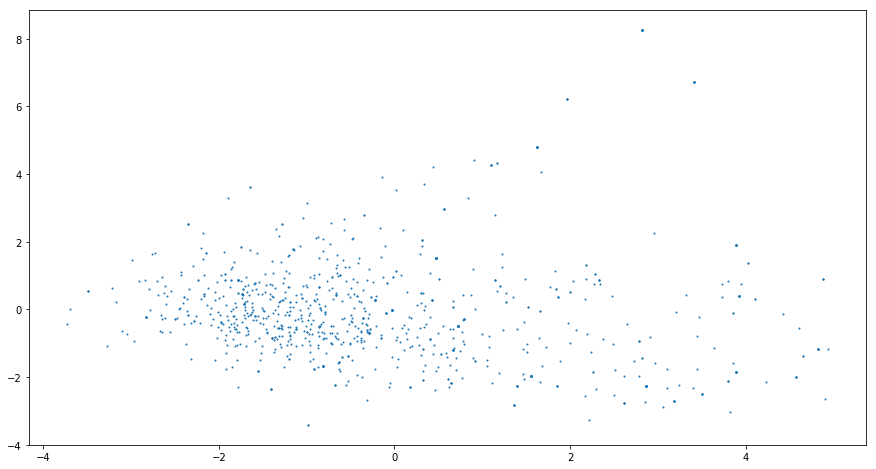

In [39]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

#sampling the model_df population
pca_df = model_df.reset_index()
pca_df = model_df.dropna(axis=0).iloc[:,1:]
pca_df = pca_df.iloc[::5]

#setting up PCA
pca = PCA(n_components=2, random_state=42)
pca = pca.fit_transform(pca_df.iloc[:, :-1])
labels = pca_df["Comments"]

#setting up plot components
x_axis = pca[:,0]
y_axis = pca[:,1]
color_map = pca_df["Comments"].map({'Positive':"blue", \
                                 'Netural':"red", \
                                 'Negative':"yellow", \
                                 })

#plotting PCA
f, axes = plt.subplots(figsize=(15,8))
plt.scatter(x_axis, y_axis, cmap='color_map', s=1)
plt.show()

# Exploratory Data Analysis #
We'll implement several interesting Natural Language Processing techniques in order to explore our Amazon dataset.

## More on Word2Vec ##
To better appreciate the concept of word embeddings, we take five common words in our corpora and derive their five most related words using our `word_vec` model. The similarity comes from how often these tokens appear in the same window of words as their `word_bank` counterpart.

In [41]:
word_bank = ["healthcare", "coronavirus", "government", "ifccworldlab2020", "worldwide"]

for word in word_bank[:]:
    related_vec = word_vec.wv.most_similar(word, topn=5)
    related_words = np.array(related_vec)[:,0]
    word_bank.extend(related_words)
    print(f"{word}: {related_words}")

healthcare: ['rely' 'overwhe' 'worker' 'themselves' 'admirable']
coronavirus: ['coronaaler' 'mild' 'record' 'nget' 'some']
government: ['burn' 'infrastructure' 'brittle' 'manufacturing' 'midnight']
ifccworldlab2020: ['amazonwebservices' 'mumbaisummit' 'postpone' 'cannabis' 'correction']
worldwide: ['nfirst' 'argentina' 'chile' 'mers' 'liechtenstein']


### Word Algebra ###
Since *Word2Vec* characterizes words into quantified tokens, we can consequently add or subtract word vectors together. To add is to combine the meaning of the components and to subtract is to take out the context of one token from another. The following are examples of this vector algebra and their similarity scores:

**Coronavirus+ifccworldlab2020**

In [42]:
word_vec.wv.most_similar(positive=["coronavirus", "ifccworldlab2020"], \
                      negative=[], topn=1)

[('popular', 0.6029951572418213)]

**coronavirus - healthcare** , **coronavirus - worldwide**

In [43]:
word_vec.wv.most_similar(positive=["coronavirus"], \
                      negative=["healthcare"], topn=1)

[('camp', 0.4676111936569214)]

In [44]:
word_vec.wv.most_similar(positive=["coronavirus"], \
                      negative=["worldwide"], topn=1)

[('furry', 0.5793269872665405)]

# Topic Modelling

Because Latent Dirichlet Allocation (LDA) can cluster documents together according to topic, the reviews can be classified and grouped according to the type of tweeted product they correspond to. The product reviews will have weights assigned to each of the topic and the topics themselves will have weights on every token. As it is a clustering-based model, LDA is unsupervised and only the num_topics is configurable.

The following are the top five words that are salient to the first group of corona virus tweets.

In [45]:
import multiprocessing

from gensim.models.ldamulticore import LdaMulticore

cores = multiprocessing.cpu_count()

num_topics = 10
bow_lda = LdaMulticore(bow, num_topics=num_topics, id2word=voc, \
                       passes=10, workers=cores, random_state=100)

for token, frequency in bow_lda.show_topic(0, topn=10):
    print(token, frequency)

coronavirus 0.06854944
have 0.035320252
case 0.029019479
from 0.023930155
india 0.015502137
italian 0.013833896
death 0.0107633965
tourist 0.010283922
break 0.009345112
positive 0.008635188


In [46]:
for topic in range(0, num_topics):
    print(f"\nTopic {topic+1}:")
    for token, frequency in bow_lda.show_topic(topic, topn=5):
        print(f" {token}, {frequency}")


Topic 1:
 coronavirus, 0.06854943931102753
 have, 0.03532025218009949
 case, 0.02901947870850563
 from, 0.023930154740810394
 india, 0.015502137131989002

Topic 2:
 coronavirus, 0.050107281655073166
 this, 0.02387525700032711
 hand, 0.022709470242261887
 your, 0.020889196544885635
 with, 0.01761789433658123

Topic 3:
 mask, 0.03198189660906792
 face, 0.02983640879392624
 coronavirus, 0.02566242404282093
 medical, 0.0241343155503273
 include, 0.019403532147407532

Topic 4:
 coronavirus, 0.0735180675983429
 there, 0.04583359137177467
 with, 0.03352723270654678
 shake, 0.028018027544021606
 hand, 0.02687731571495533

Topic 5:
 coronavirus, 0.05519440397620201
 case, 0.03390083834528923
 health, 0.027128534391522408
 confirm, 0.026143180206418037
 have, 0.0186324380338192

Topic 6:
 coronavirus, 0.04758588597178459
 this, 0.02752882055938244
 have, 0.021520916372537613
 korea, 0.01920424774289131
 million, 0.015832284465432167

Topic 7:
 coronavirus, 0.08107677847146988
 case, 0.022768888

In [47]:
import pyLDAvis.gensim

lda_idm = pyLDAvis.gensim.prepare(bow_lda, bow, voc)

pyLDAvis.display(lda_idm)

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


# Machine Learning

## Dealing with NaNs ##
It is important that we impute NaN values before we feed them into a model because machine learning algorithms can only work with *real* numbers. Our dataframe was derived from employing a *Word2Vec* model and so the only way we could have invalid entries that would become NaN values is when we have empty documents.

If a review contains no tokens then every dimension would become NaN. And so to find out the indices of NaN documents, we just have to filter reviews that have a NaN on the first dimension (or any dimension at all).

In [48]:
nan_list = model_df[model_df[0].isna()].index
nan_list = nan_list.tolist()

print(nan_list[0:50])

[675, 681, 2861]


In [49]:
print(*[tokenize[blank] for blank in nan_list[0:5]])

[] [] []


In [50]:
for blank in nan_list[0:5]:
    display(twitter_data["tweets"].iloc[blank])

'b rt xe2 x80 xa6'

'b rt xe2 x80 xa6'

'b rt xe2 x80 xa6'

In [51]:
print(f"Original 'model_df' count: {len(model_df)}")
print(f"Final 'model_df' count: {len(model_df.dropna(axis=0))}")

model_df = model_df.dropna(axis=0)
display(model_df.head())

Original 'model_df' count: 4999
Final 'model_df' count: 4996


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Comments
0,0.022468,-0.255259,-0.296845,0.091414,0.028120,-0.327480,-0.110689,0.247038,0.410001,-0.698171,...,0.174160,0.271545,-0.273205,-0.312536,0.220483,0.129051,0.548075,0.104831,-0.243715,b rt ifccworldlab2020 be postpone due to grow ...
1,-0.272544,0.520144,0.586538,-0.106260,-1.253562,-0.529685,-0.198331,0.130208,0.331318,0.379542,...,-0.143632,0.593588,-0.018499,-0.511964,0.135675,0.395242,0.184098,0.099131,0.522830,b rt be anyone else xe2 x80 x99a town idiot st...
2,-1.142192,-0.073866,0.285925,0.069599,-0.510710,-1.897934,0.003667,-1.388270,0.316800,-1.183123,...,0.133510,-0.146724,-0.301177,-1.640360,0.182531,0.990405,0.276387,0.152840,0.684641,b rt please retweet ndon t panic n coronavirus...
3,0.072262,0.113602,0.322011,0.164323,0.230205,-0.457755,0.584299,0.236838,0.149072,0.269393,...,-0.027167,-0.921969,-0.199147,-0.048745,0.461439,0.690821,0.555237,0.544873,0.739246,b rt chinese scientist have achieve considerab...
4,0.311354,-0.567362,0.522664,0.612825,0.293736,-1.367510,0.329151,-0.431467,0.544155,-0.765934,...,-0.140604,0.708058,-0.564240,-1.079903,0.656319,0.893210,-0.147253,0.286123,0.660338,b reduce your risk from coronavirus


# Automatic Summarization

In [61]:
import nltk
import seaborn as sns
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen  
from gensim.summarization.summarizer import summarize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt


In [62]:
def Summarizer(link,ratio):
    pg = urlopen(link)
    soup = BeautifulSoup(pg)
    lst=[]
    for i in soup.find_all('p'):
        lst.append(i.text)
    docs =' '.join(lst)
    
    sentence_list = nltk.sent_tokenize(docs)
    print("Total No.of Sentence:",len(sentence_list))
    bow_matrix = CountVectorizer().fit_transform(sentence_list)
    normalized_matrix = TfidfTransformer().fit_transform(bow_matrix)
    similarity_graph = normalized_matrix * normalized_matrix.T
    plt.subplots(figsize=(15,9))
    sns.heatmap(pd.DataFrame(similarity_graph.toarray()), linewidths=.5, cmap="YlGnBu")    
    plt.show()
    print(summarize(docs, ratio=ratio))

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\builder\_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)


Total No.of Sentence: 100


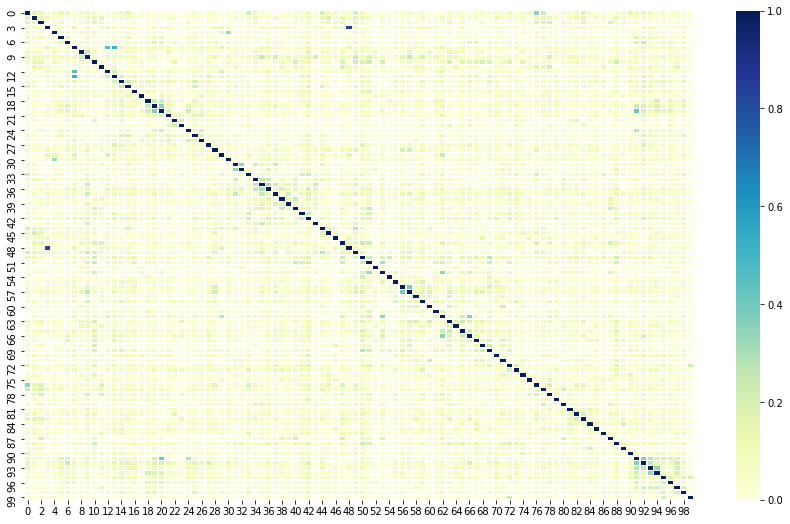

The genome size of coronaviruses ranges from approximately 27 to 34 kilobases, the largest among known RNA viruses.[7] The name coronavirus is derived from the Latin corona, meaning "crown" or "halo", which refers to the characteristic appearance reminiscent of a crown or a solar corona around the virions (virus particles) when viewed under two-dimensional transmission electron microscopy, due to the surface covering in club-shaped protein spikes.


In [63]:
link = 'https://en.wikipedia.org/wiki/Coronavirus'
ratio = 2  # in percent
Summarizer(link,ratio/100)